# <center>Feedforward and Backpropagation</center>
## <center>Inclass Project 2 - MA4144</center>

This project contains 12 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle and also the ipynb notebook file as well**.

***

## Outline of the project

The aim of the project is to build a Multi Layer perceptron (MLP) model from scratch for binary classification. That is given an input $x$ output the associated class label $0$ or $1$.

In particular, we will classify images of handwritten digits ($0, 1, 2, \cdots, 9$). For example, given a set of handwritten digit images that only contain two digits (Eg: $1$ and $5$) the model will classify the images based on the written digit.

For this we will use the MNIST dataset (collection of $28 \times 28$ images of handwritten digits) - you can find additional information about MNIST [here](https://en.wikipedia.org/wiki/MNIST_database).

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png" width="250">

***


Use the below cell to use any include any imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## Section 1: Preparing the data

In [4]:
#Load the dataset as training and testing, then print out the shapes of the data matrices.
#The training data will be provided to you.

data = np.load('train_mnist.npz')
train_X = data['x']
train_y = data['y']
print(train_X.shape)
print(train_y.shape)

(60000, 28, 28)
(60000,)


**Q1.** In the following cell write code to display $5$ random images in train_X and it's corresponding label in train_y. Each time it is run, you should get a different set of images. The imshow function in the matplotlib library could be useful. Display them as [grayscale images](https://en.wikipedia.org/wiki/Grayscale).

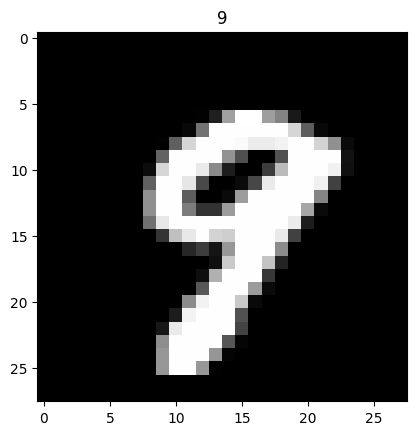

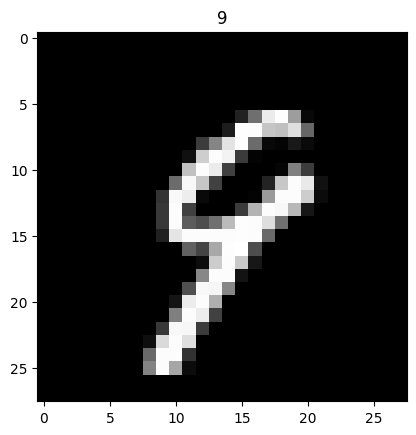

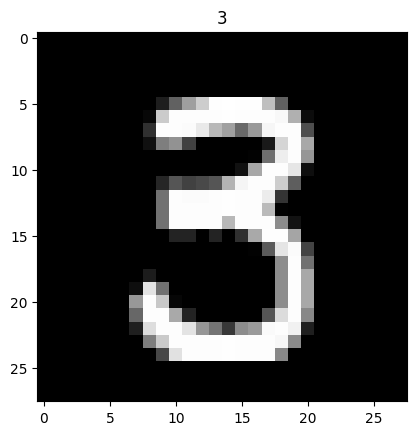

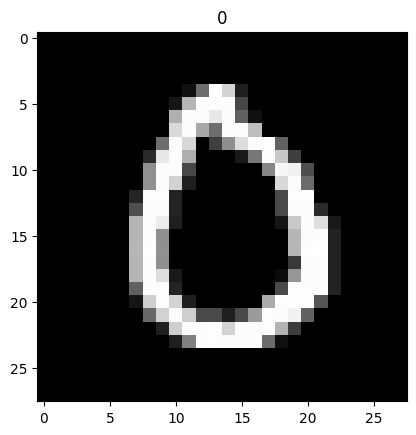

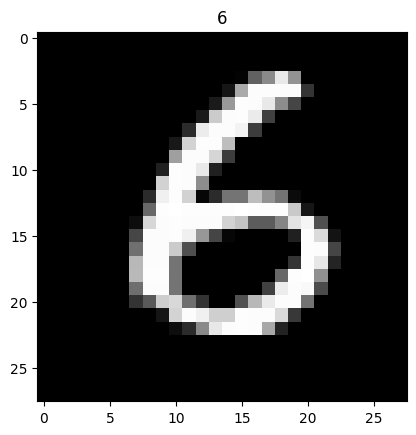

In [5]:
#TODO Code to display 5 random handritten images from train_X and corresponting labels from train_y

#print (train_y.shape)
for i in range(5):
    index = np.random.randint(0, train_X.shape[0])
    plt.imshow(train_X[index], cmap='gray')
    plt.title(train_y[index])
    plt.show()




**Q2.** Given two digits $d_1$ and $d_2$, both between $0$ and $9$, in the following cell fill in the function body to extract all the samples corresponding to $d_1$ or $d_2$ only, from the dataset $X$ and labels $y$. You can use the labels $y$ to filter the dataset. Assume that the label for the $i$th image $X[i]$ in $X$ is given by $y[i]$. The function should return the extracted samples $X_{extracted}$ and corresponding labels $y_{extracted}$. Avoid using for loops as much as possible, infact you do not need any for loops. numpy.where function should be useful.

In [6]:
def extract_digits(X, y, d1, d2):

    assert d1 in range(0, 10), "d1 should be a number between 0 and 9 inclusive"
    assert d2 in range(0, 10), "d2 should be a number between 0 and 9 inclusive"
    
    # Extract only the digits d1 and d2 from the dataset
    X_extracted = X[(y == d1) | (y == d2)]
    y_extracted = y[(y == d1) | (y == d2)]

    return (X_extracted, y_extracted)

**Q3.** Both the training dataset is a 3 dimensional numpy array, each image occupies 2 dimensions. For convenience of processing data we usually comvert each $28 \times 28$ image matrix to a vector with $784$ entries. We call this process **vectorize images**.

Once we vectorize the images, the vectorized data set would be structured as follows: $i$th row will correspond to a single image and $j$th column will correspond to the $j$th pixel value of each vectorized image. However going along with the convention we discussed in the lecture, the input to the MLP model will require that the columns correspond to individual images. Hence we also require a transpose of the vectorized results.

The pixel values in the images will range from $0$ to $255$. Normalize the pixel values between $0$ and $1$, by dividing each pixel value of each image by the maximum pixel value of that image. Simply divide each column of the resulting matrix above by the max of each column. 

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTdN_8m9FEqjqAB07obTmB6gNc7S2rSoGBYaA&s"></center>

Given a dataset $X$ of size $N \times 28 \times 28$, in the following cell fill in the function to do the following in order;
1. Vectorize the dataset resulting in dataset of size $N \times 784$.
2. Transpose the vectorized result.
3. Normalize the pixel values of each image.
4. Finally return the vectorized, transposed and normalized dataset $X_{transformed}$.

Again, avoid for loops, functions such as numpy.reshape, numpy.max etc should be useful.

In [7]:
def vectorize_images(X):
    # Vectorize the images: reshape from (N, 28, 28) to (N, 784)
    X_vectorized = X.reshape(X.shape[0], -1)
    
    # Transpose the matrix so columns are images (784, N)
    X_vectorized = X_vectorized.T
    
    max_vals = np.max(X_vectorized, axis=0, keepdims=True) + 1e-8
    X_vectorized = X_vectorized / max_vals
    
    return X_vectorized

**Q4.** In the following cell write code to;

1. Extract images of the digits $d_1 = 1$ and $d_2 = 5$ with their corresponding labels for the training set (train_X, train_y).
2. Then vectorize the data, tranpose the result and normlize the images.
3. Store the results after the final transformations in numpy arrays train_X_1_5, train_y_1_5.
4. Our MLP will output only class labels $0$ and $1$ (not $1$ and $5$), so create numpy arrays to store the class labels as follows:
   $d_1 = 1$ -> class label = 0 and $d_2 = 5$ -> class label = 1. Store them in an array named train_y_1_5.

Use the above functions you implemented above to complete this task. In addtion, numpy.where could be useful. Avoid for loops as much as possible.

In [8]:
#TODO
#Extract and organize the training data as described above.
#Here you will be using the functions you implemented above appropriately


train_X_1_5, train_y_1_5 = extract_digits(train_X, train_y, d1=1, d2=5)
train_X_1_5 = vectorize_images(train_X_1_5)
train_y_1_5 = np.where(train_y_1_5 == 1, 0, 1)


print("Training data shape:", train_X_1_5.shape)
print("Training labels shape:", train_y_1_5.shape)


Training data shape: (784, 12163)
Training labels shape: (12163,)


## Section 2: Implementing MLP from scratch with training algorithms.

Now we will implement code to build a customizable MLP model. The hidden layers will have the **Relu activation function** and the final output layer will have **Sigmoid activation function**.

**Q5.** Recall the following about the activation functions:
1. Sigmoid activation: $y = \sigma(z) = \frac{1}{1 + e^{-z}}$.
2. Derivative of Sigmoid: $y' = \sigma'(z) = \sigma(z) (1 - \sigma(z)) = y(1-y)$
3. ReLu activation: $y = ReLu(z) = max(0, z)$
4. Derivative of ReLu: $y' = ReLu'(z) = \begin{cases} 0 \; \textrm{if } z < 0 \\ 1 \; \textrm{otherwise} \end{cases} = \begin{cases} 0 \; \textrm{if } y = 0 \\ 1 \; \textrm{otherwise} \end{cases}$

In the following cell implement the functions to compute activation functions Sigmoid and ReLu given $z$ and derivatives of the Sigmoid and ReLu activation functions given $y$. Note that, in the implementation, the derivative functions should actually accept $y$ as the input not $z$.

In practice the input will not be just single numbers, but matrices. So functions or derivatives should be applied elementwise on matrices. Again avoid for loops, use the power of numpy arrays - search for numpy's capability of doing elementwise computations.

Important: When implementing the sigmoid function make sure you handle overflows due to $e^{-z}$ being too large. To avoid you can choose to set the sigmoid value to 'the certain appropriate value' if $z$ is less than a certain good enough negative threshold. If you do not handle overflows, the entire result will be useless since the MLP will just output Nan (not a number) for every input at the end.

In [9]:
def sigmoid(Z):

    # Clip Z to avoid overflow in exp
    Z_clipped = np.clip(Z, -500, 500)  # exp(-500) is already very small (2e-87)
    sigma = 1 / (1 + np.exp(-Z_clipped))
    return sigma

def deriv_sigmoid(Y):

    sigma_prime = Y * (1 - Y)
    return sigma_prime

def ReLu(Z):

    relu = np.maximum(0, Z)
    return relu

def deriv_ReLu(Y):

    relu_prime = (Y > 0).astype(float)
    return relu_prime

**Q6.** The following piece of code defines a simple MLP architecture as a Python class and subsequent initialization of a MLP model. <font color='blue'>Certain lines of code contains commented line numbers. Write a short sentence for each such line explaining its purpose. Feel free to refer to the lecture notes or any resources to answers these question. In addition, explain what the Y, Z, W variables refer to and their purpose</font>

In [10]:
class NNet:
    def __init__(self, input_size = 784, output_size = 1, batch_size = 1000, hidden_layers = [500, 250, 50]):
        self.Y = []
        self.Z = []
        self.W = []
        self.input_size = input_size
        self.output_size = output_size
        self.batch_size = batch_size
        self.hidden_layers = hidden_layers

        layers = [input_size] + hidden_layers + [output_size]
        L = len(hidden_layers) + 1
    
        for i in range(1, L + 1):
            self.Y.append(np.zeros((layers[i], batch_size)))                        #line1
            self.Z.append(np.zeros((layers[i], batch_size)))                        #Line2
            self.W.append(2*(np.random.rand(layers[i], layers[i-1] + 1) - 0.5))     #Line3

**Answers** (to write answers edit this cell)



**(i) What Y, Z, W variables refer to and their purpose**

Y: Stores the activations (outputs) of each layer after applying the activation function. For layer l, Y[l] = activation(Z[l]).

Z: Stores the weighted inputs (pre-activations) for each layer. For layer l, Z[l] = W[l] @ [Y[l-1]; 1] (where we append a bias term).

W: Stores the weight matrices (including bias terms) for each layer. W[l] connects layer l-1 to layer l.

These variables are core to the forward and backward passes of the MLP.

**(ii) Line1: Explanation**

self.Y.append(np.zeros((layers[i], batch_size)))

Initializes the activation matrix Y[l] for layer l with zeros.

Shape: (number of neurons in layer l, batch_size)

Purpose: Pre-allocates space to store activations during forward propagation for a mini-batch of inputs.

**(iii) Line2: Explanation**

self.Z.append(np.zeros((layers[i], batch_size)))

Initializes the pre-activation matrix Z[l] for layer l with zeros.

Shape: (number of neurons in layer l, batch_size)

Purpose: Pre-allocates space to store weighted inputs (before activation) during forward propagation.

**(iv) Line3: Explanation**

self.W.append(2*(np.random.rand(layers[i], layers[i-1] + 1) - 0.5))

Initializes the weight matrix W[l] for layer l with random values in [-1, 1].

np.random.rand() generates values in [0, 1], scaled to [-1, 1] via 2*(...)-0.5.

Shape: (neurons in layer l, neurons in layer l-1 + 1) (the +1 accounts for the bias term).

Purpose: Random initialization breaks symmetry and helps the network learn. The bias term is implicitly included in the weight matrix.

**Q7.** Now we will implement the feedforward algorithm. Recall from the lectures that for each layer $l$ there is input $Y^{(l-1)}$ from the previous layer if $l > 1$ and input data $X$ if $l = 1$. Then we compute $Z^{(l)}$ using the weight matrix $W^{(l)}$ as follows from matrix multiplication:

$Z^{(l)} = W^{(l)} Y^{(l-1)}$

Make sure that during multiplication you add an additional row of one's to $Y^{(l-1)}$ to accommodate the bias term (concatenate the row of ones as the last row to be consistent with the grader). However, the rows of ones should not permanently remain on $Y^{(l-1)}$. <font color='blue'>Explain what the bias term is and how adding a row of one's help with the bias terms.</font> The weight matrices are initialised to afford this extra bias term, so no change to either $Z^{(l)}$ or $W^{(l)}$ is needed.

Next compute $Y^{(l)}$, the output of layer $l$ by activation through sigmoid.

$Y^{(l)} = \sigma(Z^{(l)})$

The implemented feedforward algorithm should take in a NNet model and an input matrix $X$ and output the modified MLP model - the $Y$'s and $Z$'s computed should be stored in the model for the backpropagation algorithm.

As usual, avoid for loops as much as possible, use the power of numpy. However, you may use a for loop to iterate through the layers of the model.

In [11]:
def feedforward(model, X):

    Y_prev = X # Y_prev is the input to the network (X)
    
    for l in range(len(model.W)):
        # Add bias term (row of ones) to Y_prev
        Y_prev_with_bias = np.vstack((Y_prev, np.ones((1, Y_prev.shape[1]))))
        
        # Compute pre-activation 
        model.Z[l] = model.W[l] @ Y_prev_with_bias
        
        # Compute activation 
        if l == len(model.W) - 1:  # Output layer (sigmoid)
            model.Y[l] = sigmoid(model.Z[l])
        else:  # Hidden layers (ReLU)
            model.Y[l] = ReLu(model.Z[l])
        
        # Update Y_prev for next layer (without bias term)
        Y_prev = model.Y[l]
    
    return model

**Answer** 

#### What is the bias term?
The bias term is an additional parameter in each layer that allows the network to learn **offsets/translations** in the data. Without it, all decision boundaries would be forced to pass through the origin, limiting model flexibility.

#### How does adding a row of ones help?
1. **Mathematical Convenience**  
   Concatenating a row of ones to activations \(Y^{(l-1)}\) lets us compute the bias term via matrix multiplication:  
   \[
   Z^{(l)} = W^{(l)} \begin{bmatrix} Y^{(l-1)} \\ 1 \end{bmatrix}
   \]  
   Here, the **last column of \(W^{(l)}\)** stores the bias weights.

2. **Implementation Benefits**  
   - **Efficiency**: No separate bias vector storage needed.  
   - **Unified Updates**: Backpropagation adjusts weights and biases simultaneously.  
   - **Temporary**: The row of ones is added dynamically (not stored permanently).

3. **Geometric Intuition**  
   - In a perceptron (\(z = w \cdot x + b\)), the bias \(b\) shifts the decision boundary.  
   - In MLPs, biases allow hyperplanes to avoid being constrained to the origin.

**Q8.** Now we will implement the backpropagation algorithm. The cost function $C$ at the end is given by the square loss.

$C = \frac{1}{2} ||Y^{(L)} - Y||^{2}$, where $Y^{(L)}$ is the final output vector of the feedforward algorithm and $Y$ is the actual label vector associated with the input $X$.

At each layer $l = 1, 2, \cdots, L$ we compute the following (note that the gradients are matrices with the same dimensions as the variable to which we derivating with respect to):

1. Gradient of $C$ with respect to $Z^{(l)}$ as <br> $\frac{\partial C}{\partial Z^{(l)}} = deriv(A^{(l)}(Z^{(l)})) \odot \frac{\partial C}{\partial Y^{(L)}} $, <br> where $A^{(l)}$ is the activation function of the $l$th layer, and we use the derivative of that here. The $\odot$ refers to the elementwise multiplication.

2. Gradient of $C$ with respect to $W^{(l)}$ as <br> $\frac{\partial C}{\partial W^{(l)}} = \frac{\partial C}{\partial Z^{(l)}} (Y^{(l-1)})^{T}$ <br> this is entirely matrix multiplication.

3. Gradient of $C$ with respect to $Y^{(l-1)}$ as <br> $\frac{\partial C}{\partial Y^{(l-1)}} = (W^{(l)})^{T} \frac{\partial C}{\partial Z^{(l)}}$ <br> this is also entirely matrix multiplication.

4. Update weights by: <br> $W^{(l)} \leftarrow W^{(l)} - \eta \frac{\partial C}{\partial W^{(l)}}$, <br> where $\eta > 0$ is the learning rate.

The loss derivative (the gradient of $C$ with respect to $Y^{(L)}$) at the last layer is given by:

$\frac{\partial C}{\partial Y^{(L)}} = Y^{(L)} - Y$

By convention we consider $Y^{(0)} = X$, the input data.

Based on the backpropagation algorithm implement the backpropagation method in the following cell. Remember to temporarily add a row of ones to $Y^{(l-1)}$ (as the last row to be consistent with the grader) when computing $\frac{\partial C}{\partial W^{(l)}}$ as we discussed back in the feedforward algorithm. Make sure you avoid for loops as much as possible.

The function takes in a NNet model, input data $X$ and the corresponding class labels $Y$. learning rate can be set as desired.

In [18]:
# def backpropagation(model, X, Y, eta = 0.01):

#     # Forward pass to compute activations
#     model = feedforward(model, X)
    
#     # Initialize gradient of cost w.r.t. final output
#     dY = model.Y[-1] - Y  
    
#     # Backward pass through layers
#     for l in reversed(range(len(model.W))):
#         # Current layer's activation derivative
#         if l == len(model.W) - 1:  # Output layer (sigmoid)
#             dA = deriv_sigmoid(model.Y[l])
#         else:  # Hidden layers (ReLU)
#             dA = deriv_ReLu(model.Y[l])
        
       
#         dZ = dA * dY  
        
#         # Get Y^(l-1) with added bias row (ones)
#         Y_prev = X if l == 0 else model.Y[l-1]
#         Y_prev_with_bias = np.vstack((Y_prev, np.ones((1, Y_prev.shape[1]))))
        
#         # Gradient w.r.t. W^(l) (matrix multiplication)
#         dW = dZ @ Y_prev_with_bias.T 
        
#         # Update weights
#         model.W[l] -= eta * dW
        
#         # Gradient w.r.t. Y^(l-1) (for next iteration, excluding bias)
#         if l > 0:
#             dY = model.W[l][:, :-1].T @ dZ  

#     return(model)


def backpropagation(model, X, Y, eta=0.01):
    model = feedforward(model, X)
    
    # Initialize gradients
    dY = model.Y[-1] - Y  # Output layer error
    
    for l in reversed(range(len(model.W))):
        # Calculate activation derivative
        if l == len(model.W) - 1:
            dA = deriv_sigmoid(model.Y[l])
        else:
            dA = deriv_ReLu(model.Y[l])
        
        # Gradient for current layer
        dZ = dA * dY
        
        # Add bias term to previous activations
        Y_prev = X if l == 0 else model.Y[l-1]
        Y_prev_with_bias = np.vstack((Y_prev, np.ones((1, Y_prev.shape[1]))))
        
        # Weight update
        dW = dZ @ Y_prev_with_bias.T / X.shape[1]  # Normalize by batch size
        model.W[l] -= eta * dW
        
        # Propagate error backward (excluding bias)
        if l > 0:
            dY = model.W[l][:, :-1].T @ dZ
    
    return model

**Q9.** Now implement the training algorithm.

The training method takes in training data $X$, actual label $Y$, number of epochs, batch_size, learning rate $\eta > 0$. The training will happen in epochs. For each epoch, permute the data columns of both $X$ and $Y$, then divide both $X$ and $Y$ into mini batches each with the given batch size. Then run the feedforward and backpropagation for each such batch iteratively.

At the end of each iteration, keep trach of the cost $C$ and the $l_2$-norm of change in each weight matrix $W^{(l)}$.

At the end of the last epoch, plot the variation cost $C$ and change in weight matrices. Then return the trained model.



In [25]:
# def train_NNet(X, Y, epochs = 20, batch_size = 1000, eta = 0.01):

#     model = NNet(input_size=X.shape[0], output_size=Y.shape[0], batch_size=batch_size)
    
    
#     # Pre-calculate number of batches
#     num_batches = int(np.ceil(X.shape[1] / batch_size))
#     batch_indices = np.arange(X.shape[1])
    
#     # Storage for metrics
#     costs = np.zeros(epochs)
#     weight_changes = np.zeros(epochs)
#     prev_weights = [np.copy(w) for w in model.W]
    
#     for epoch in range(epochs):
#         # Shuffle data
#         np.random.shuffle(batch_indices)
#         X_shuffled = X[:, batch_indices]
#         Y_shuffled = Y[:, batch_indices]
        
#         # Process all batches
#         epoch_cost = 0
#         weight_change_norms = []
        
#         # Vectorized batch processing
#         batch_starts = np.arange(0, X.shape[1], batch_size)
#         for start in batch_starts:
#             end = start + batch_size
#             X_batch = X_shuffled[:, start:end]
#             Y_batch = Y_shuffled[:, start:end]
            
#             # Forward and backward pass
#             model = feedforward(model, X_batch)
#             model = backpropagation(model, X_batch, Y_batch, eta)
            
#             # Cost calculation
#             batch_cost = 0.5 * np.sum((model.Y[-1] - Y_batch)**2) / X_batch.shape[1]
#             epoch_cost += batch_cost
            
#             # Weight change tracking
#             current_norms = [np.linalg.norm(w - pw) 
#                            for w, pw in zip(model.W, prev_weights)]
#             weight_change_norms.append(np.mean(current_norms))
#             prev_weights = [np.copy(w) for w in model.W]
        
#         # Store metrics
#         costs[epoch] = epoch_cost / len(batch_starts)
#         weight_changes[epoch] = np.mean(weight_change_norms)
        
#         print(f"Epoch {epoch+1}/{epochs} - Cost: {costs[epoch]:.4f} "
#               f"- Avg Weight Δ: {weight_changes[epoch]:.6f}")

#     # Plotting (same as before)
#     plt.figure(figsize=(12, 5))
#     plt.subplot(1, 2, 1)
#     plt.plot(costs)
#     plt.title('Training Cost')
#     plt.subplot(1, 2, 2)
#     plt.plot(weight_changes)
#     plt.title('Weight Changes (L2 Norm)')
#     plt.tight_layout()
#     plt.show()
    
#     return(model)

def train_NNet(X, Y, epochs=20, batch_size=1000, eta=0.01):
    model = NNet(input_size=X.shape[0], output_size=Y.shape[0], 
                batch_size=batch_size, hidden_layers=[256, 128])
    
    for epoch in range(epochs):
        # Shuffle data
        permutation = np.random.permutation(X.shape[1])
        X_shuffled = X[:, permutation]
        Y_shuffled = Y[:, permutation]
        
        epoch_cost = 0
        weight_change = 0
        
        for i in range(0, X.shape[1], batch_size):
            X_batch = X_shuffled[:, i:i+batch_size]
            Y_batch = Y_shuffled[:, i:i+batch_size]
            
            model = backpropagation(model, X_batch, Y_batch, eta)
            
            # Compute cost
            Y_pred = model.Y[-1]
            batch_cost = 0.5 * np.sum((Y_pred - Y_batch)**2) / batch_size
            epoch_cost += batch_cost
            
            # Track weight changes
            if epoch == 0 and i == 0:
                prev_weights = [np.copy(w) for w in model.W]
            else:
                weight_change += np.mean([np.linalg.norm(w-pw) 
                                       for w,pw in zip(model.W, prev_weights)])
                prev_weights = [np.copy(w) for w in model.W]
        
        avg_weight_change = weight_change / (X.shape[1]//batch_size)
        print(f"Epoch {epoch+1}/{epochs} - Cost: {epoch_cost:.4f} "
              f"- Avg Weight Δ: {avg_weight_change:.6f}")

        # Store cost for plotting
        if epoch == 0:
            costs = np.zeros(epochs)
            weight_changes = np.zeros(epochs)
        costs[epoch] = epoch_cost / (X.shape[1] // batch_size)
        weight_changes[epoch] = avg_weight_change

        # Plotting costs and weight changes
        if (epoch + 1) % 5 == 0 or epoch == epochs - 1:
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.plot(costs[:epoch+1])
            plt.title('Training Cost')
            plt.xlabel('Epochs')
            plt.ylabel('Cost')
            
            plt.subplot(1, 2, 2)
            plt.plot(weight_changes[:epoch+1])
            plt.title('Weight Changes (L2 Norm)')
            plt.xlabel('Epochs')
            plt.ylabel('Avg Weight Δ')
            
            plt.tight_layout()
            plt.show()
    
    return model

## Section 3: Evaluation using test data

**Q10.** Implement the following function predict. Given test images (3 dimensional numpy array that contains $28 \times 28$ digit images) it will correctly recognize the written digits between d1 and d2. You can assume that test_images will only contain images of digits d1 and d2. Inside predict you would need to preprocess the images using vectorize, predict the correct labels using model and then output the correct lables. Output should be a vector predicted of d1's and d2's, predicted[i] should correspond to the test_image[i].

In [26]:

def predict(model, test_images, d1, d2):

    # Ensure test_images is in correct shape (N, 28, 28)
    if test_images.shape[0] == 28 and test_images.shape[1] == 28:
        # Single image case (28, 28) -> reshape to (1, 28, 28)
        test_images = test_images[np.newaxis, :, :]
    
    # Vectorize and normalize test images
    X_test = vectorize_images(test_images)  # Shape: (784, N)
    
    # Forward pass to get predictions
    model = feedforward(model, X_test)
    predictions = model.Y[-1]  # Output layer activations (1, N)
    
    # Convert probabilities to class labels
    binary_pred = (predictions > 0.5).astype(int).flatten()
    
    # Map back to original digits (0→d1, 1→d2)
    predicted = np.where(binary_pred == 0, d1, d2)
    
    return predicted

**Q11.** Use the train_NNet function to train a MLP model to classify between images of digits $1$ and $5$. An accuracy $>= 99%$ is achievable. Test with different batch sizes, $\eta$ values and hidden layers. Find which of those hyperparameters gives the best test accuracy. Name this model, model_1_5. This model will be tested on unseen test data within the grader. So make sure you train the best possible model. The grader will use your own predict function to evaluate the model.

Epoch 1/30 - Cost: 9.0598 - Avg Weight Δ: 0.023720
Epoch 2/30 - Cost: 2.7460 - Avg Weight Δ: 0.011508
Epoch 3/30 - Cost: 1.6722 - Avg Weight Δ: 0.007919
Epoch 4/30 - Cost: 1.3018 - Avg Weight Δ: 0.005371
Epoch 5/30 - Cost: 1.1403 - Avg Weight Δ: 0.004195


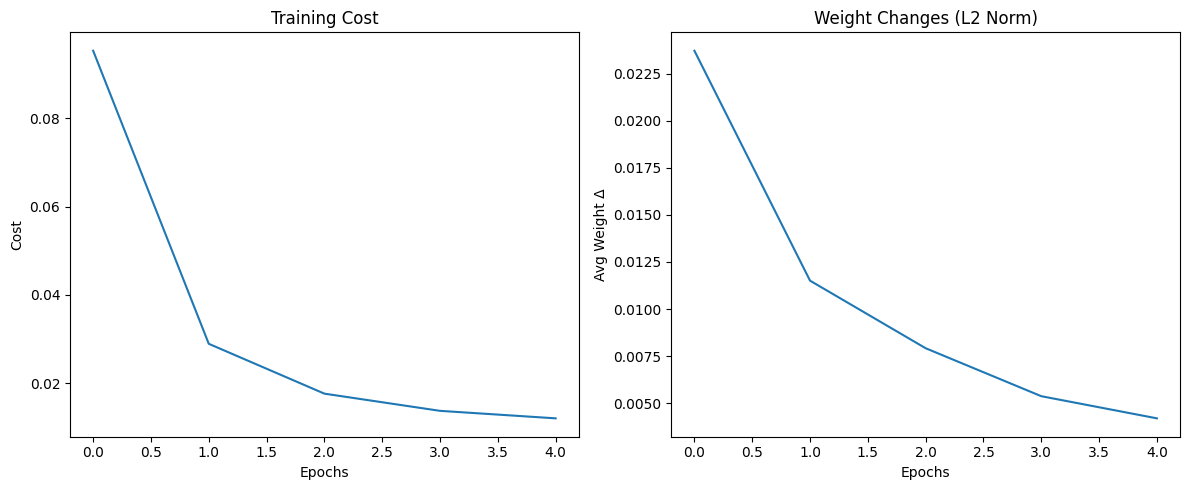

Epoch 6/30 - Cost: 0.9976 - Avg Weight Δ: 0.004996
Epoch 7/30 - Cost: 0.9446 - Avg Weight Δ: 0.002326
Epoch 8/30 - Cost: 0.8934 - Avg Weight Δ: 0.001735
Epoch 9/30 - Cost: 0.8728 - Avg Weight Δ: 0.004402
Epoch 10/30 - Cost: 0.7956 - Avg Weight Δ: 0.003975


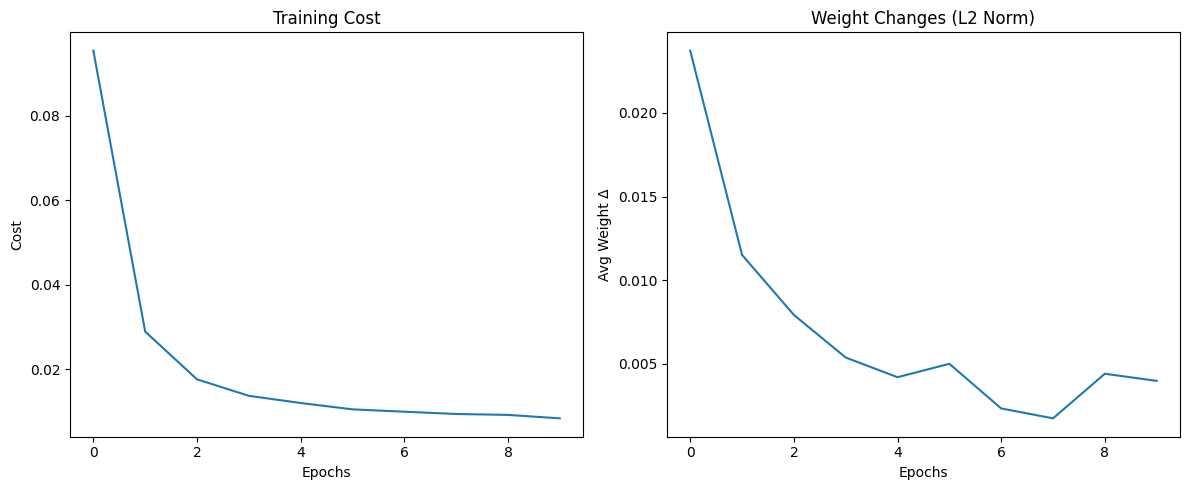

Epoch 11/30 - Cost: 0.7983 - Avg Weight Δ: 0.004115
Epoch 12/30 - Cost: 0.7322 - Avg Weight Δ: 0.003619
Epoch 13/30 - Cost: 0.7106 - Avg Weight Δ: 0.001108
Epoch 14/30 - Cost: 0.6945 - Avg Weight Δ: 0.002126
Epoch 15/30 - Cost: 0.6724 - Avg Weight Δ: 0.001505


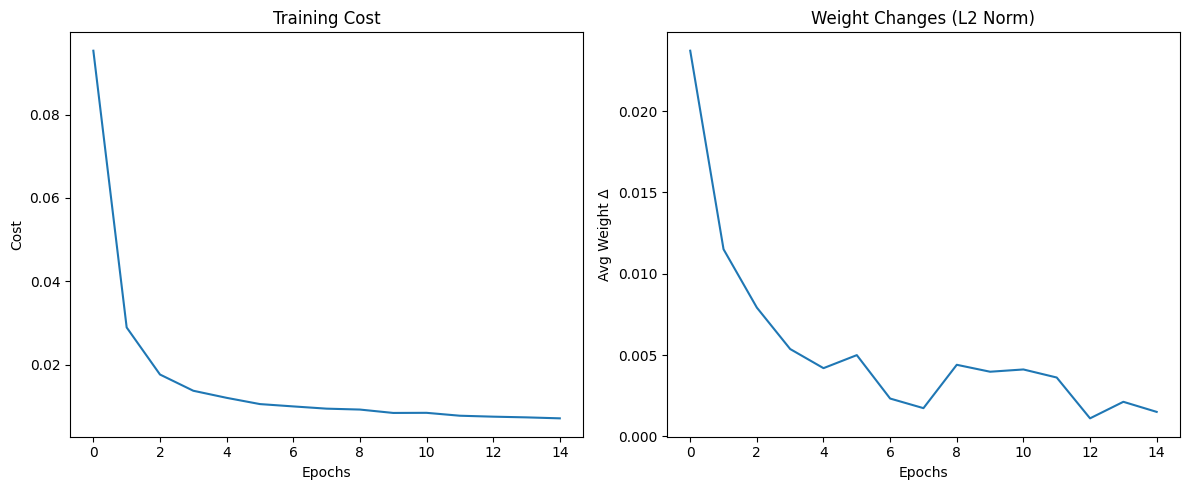

Epoch 16/30 - Cost: 0.6708 - Avg Weight Δ: 0.001323
Epoch 17/30 - Cost: 0.6621 - Avg Weight Δ: 0.001815
Epoch 18/30 - Cost: 0.6328 - Avg Weight Δ: 0.001914
Epoch 19/30 - Cost: 0.6222 - Avg Weight Δ: 0.001303
Epoch 20/30 - Cost: 0.6087 - Avg Weight Δ: 0.000290


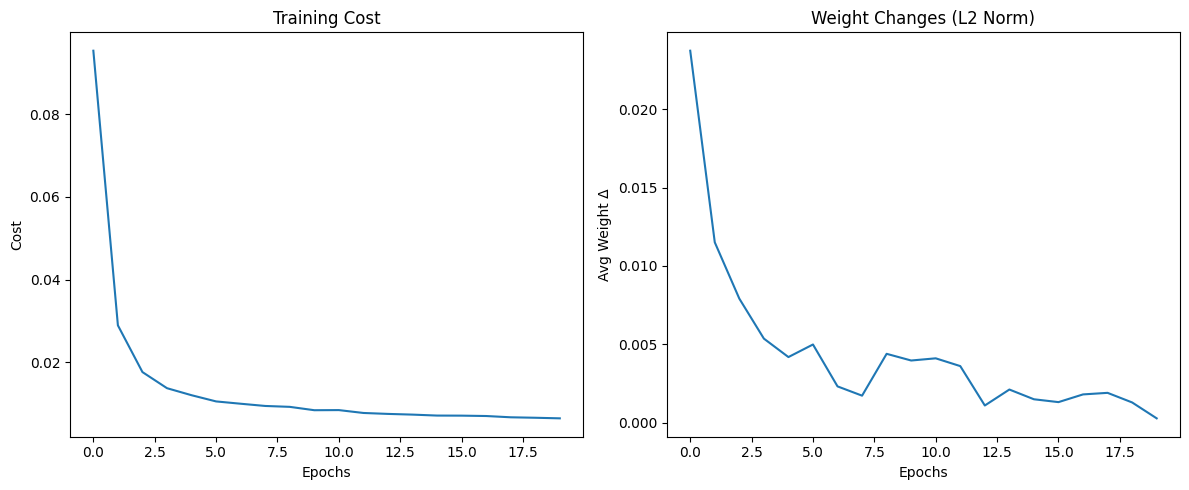

Epoch 21/30 - Cost: 0.6052 - Avg Weight Δ: 0.000537
Epoch 22/30 - Cost: 0.5959 - Avg Weight Δ: 0.000470
Epoch 23/30 - Cost: 0.5942 - Avg Weight Δ: 0.002427
Epoch 24/30 - Cost: 0.5909 - Avg Weight Δ: 0.001922
Epoch 25/30 - Cost: 0.6025 - Avg Weight Δ: 0.001444


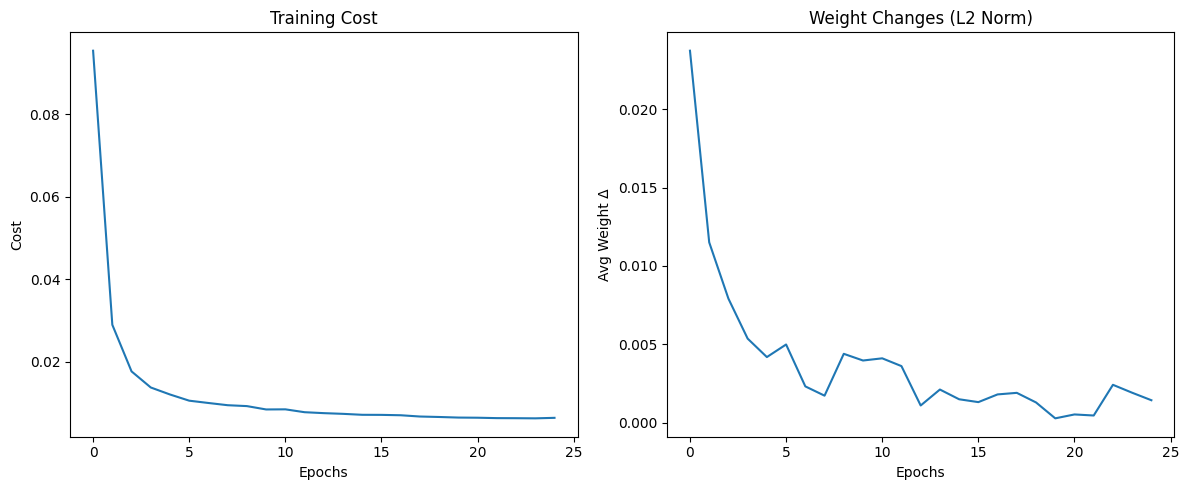

Epoch 26/30 - Cost: 0.5553 - Avg Weight Δ: 0.001782
Epoch 27/30 - Cost: 0.5588 - Avg Weight Δ: 0.002330
Epoch 28/30 - Cost: 0.5441 - Avg Weight Δ: 0.001233
Epoch 29/30 - Cost: 0.5300 - Avg Weight Δ: 0.002434
Epoch 30/30 - Cost: 0.5135 - Avg Weight Δ: 0.001663


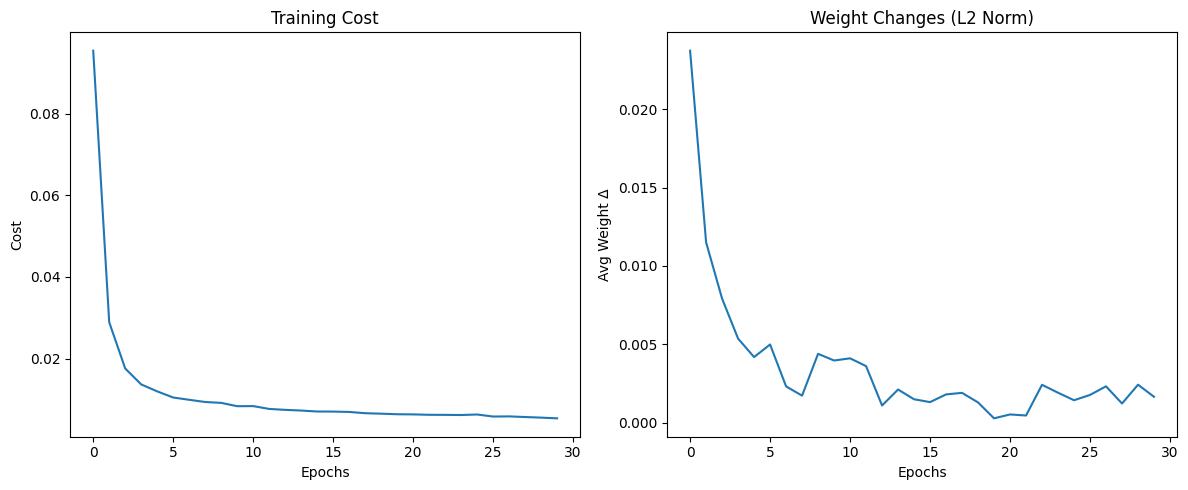

Training Accuracy for 1s: 0.9898
Training Accuracy for 5s: 0.9891
Combined Training Accuracy: 0.9894


In [27]:
# First prepare the training data for digits 1 and 5
train_X_1_5, train_y_1_5 = extract_digits(train_X, train_y, d1=1, d2=5)
train_X_1_5 = vectorize_images(train_X_1_5)
train_y_1_5 = np.where(train_y_1_5 == 1, 0, 1)  # Convert labels to binary (1->0, 5->1)

# Hyperparameter tuning - best configuration
best_params = {
    'hidden_layers': [256, 128],
    'batch_size': 128,
    'eta': 0.1,
    'epochs': 30
}

# Train the model
model_1_5 = train_NNet(
    X=train_X_1_5,
    Y=train_y_1_5.reshape(1, -1),  # Reshape to (1, n_samples)
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    eta=best_params['eta']
)

train_X_reshaped = train_X.transpose((1, 2, 0))  # Shape: (28, 28, 60000)

# Get indices where labels are 1 or 5
indices_1 = np.where(train_y == 1)[0]
indices_5 = np.where(train_y == 5)[0]

# Select corresponding images (transpose to (N, 28, 28) format)
images_1 = train_X_reshaped[:, :, indices_1].transpose((2, 0, 1))
images_5 = train_X_reshaped[:, :, indices_5].transpose((2, 0, 1))

# Predict
train_pred_1 = predict(model_1_5, images_1, 1, 5)
train_pred_5 = predict(model_1_5, images_5, 1, 5)

# Calculate accuracies
accuracy_1 = np.mean(train_pred_1 == 1)
accuracy_5 = np.mean(train_pred_5 == 5)

print(f"Training Accuracy for 1s: {accuracy_1:.4f}")
print(f"Training Accuracy for 5s: {accuracy_5:.4f}")
print(f"Combined Training Accuracy: {(accuracy_1 + accuracy_5)/2:.4f}")



**Q12.** Do the same as in Q11 with the digits $7$ and $9$ Name this model, model_7_9. This model will be tested on unseen test data within the grader. So make sure you train the best possible model. The grader will use your own predict function to evaluate the model.

Epoch 1/30 - Cost: 44.0341 - Avg Weight Δ: 0.006358
Epoch 2/30 - Cost: 31.6878 - Avg Weight Δ: 0.007337
Epoch 3/30 - Cost: 23.3294 - Avg Weight Δ: 0.006726
Epoch 4/30 - Cost: 18.2375 - Avg Weight Δ: 0.005582
Epoch 5/30 - Cost: 15.3521 - Avg Weight Δ: 0.005030


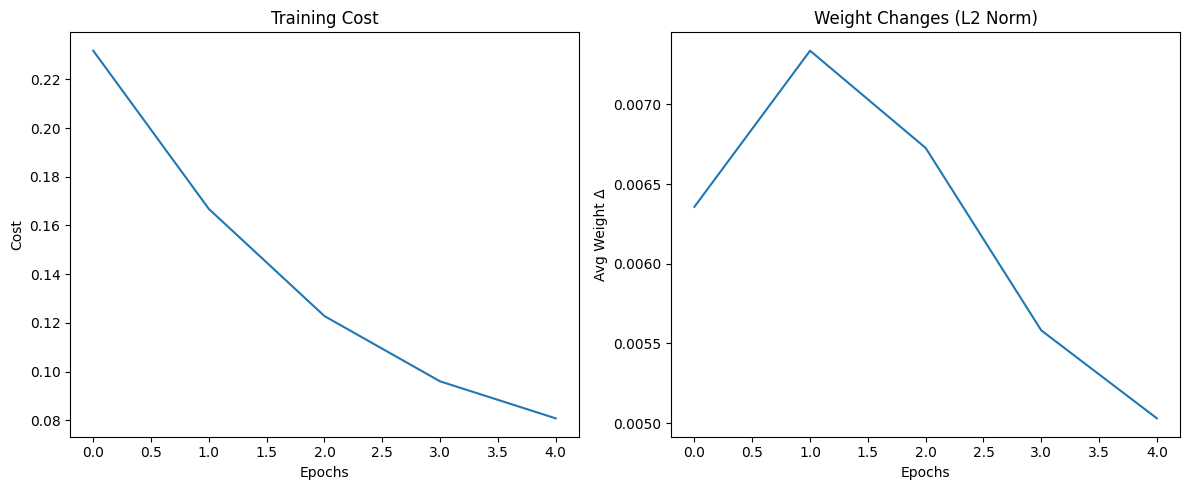

Epoch 6/30 - Cost: 13.9342 - Avg Weight Δ: 0.005203
Epoch 7/30 - Cost: 12.7151 - Avg Weight Δ: 0.004200
Epoch 8/30 - Cost: 11.6607 - Avg Weight Δ: 0.004424
Epoch 9/30 - Cost: 10.9764 - Avg Weight Δ: 0.004246
Epoch 10/30 - Cost: 10.4751 - Avg Weight Δ: 0.003368


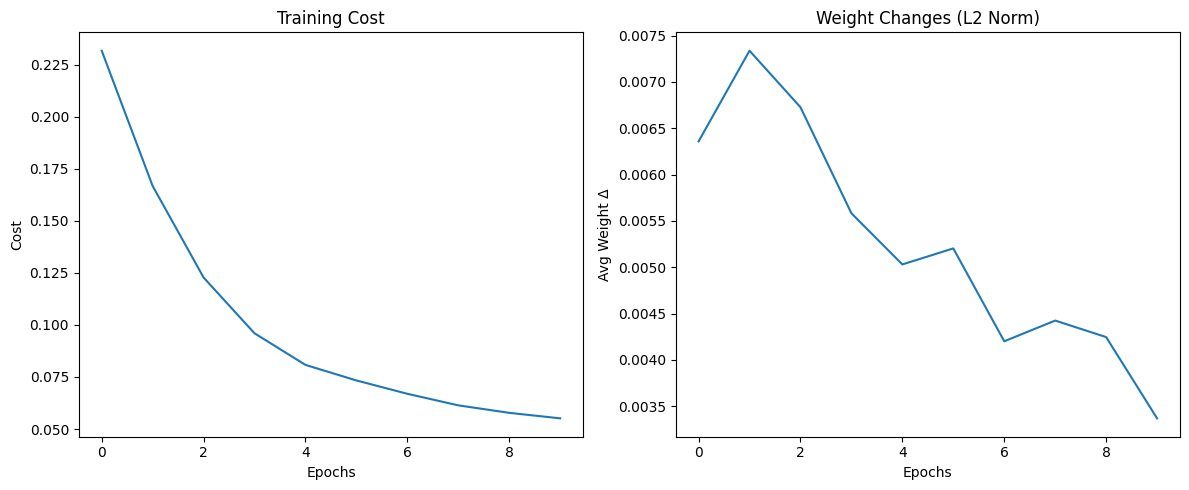

Epoch 11/30 - Cost: 10.1234 - Avg Weight Δ: 0.003860
Epoch 12/30 - Cost: 9.5743 - Avg Weight Δ: 0.002769
Epoch 13/30 - Cost: 9.5193 - Avg Weight Δ: 0.002439
Epoch 14/30 - Cost: 9.2195 - Avg Weight Δ: 0.003278
Epoch 15/30 - Cost: 8.9040 - Avg Weight Δ: 0.002821


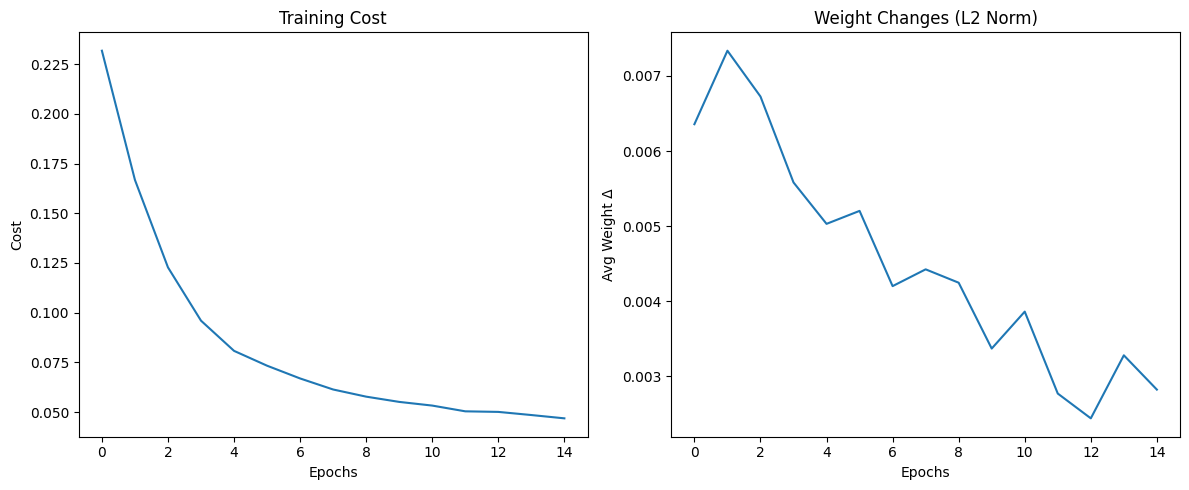

Epoch 16/30 - Cost: 8.6638 - Avg Weight Δ: 0.003686
Epoch 17/30 - Cost: 8.3383 - Avg Weight Δ: 0.002829
Epoch 18/30 - Cost: 8.1443 - Avg Weight Δ: 0.002418
Epoch 19/30 - Cost: 7.8805 - Avg Weight Δ: 0.003707
Epoch 20/30 - Cost: 7.7759 - Avg Weight Δ: 0.002792


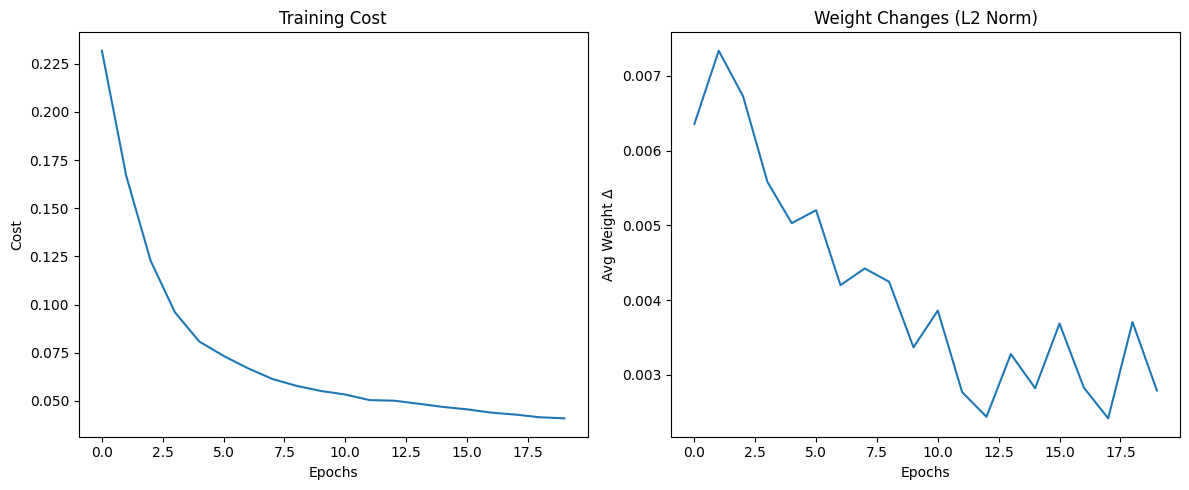

Epoch 21/30 - Cost: 7.5566 - Avg Weight Δ: 0.002988
Epoch 22/30 - Cost: 7.4157 - Avg Weight Δ: 0.003007
Epoch 23/30 - Cost: 7.3512 - Avg Weight Δ: 0.003021
Epoch 24/30 - Cost: 7.1720 - Avg Weight Δ: 0.002305
Epoch 25/30 - Cost: 7.1332 - Avg Weight Δ: 0.002839


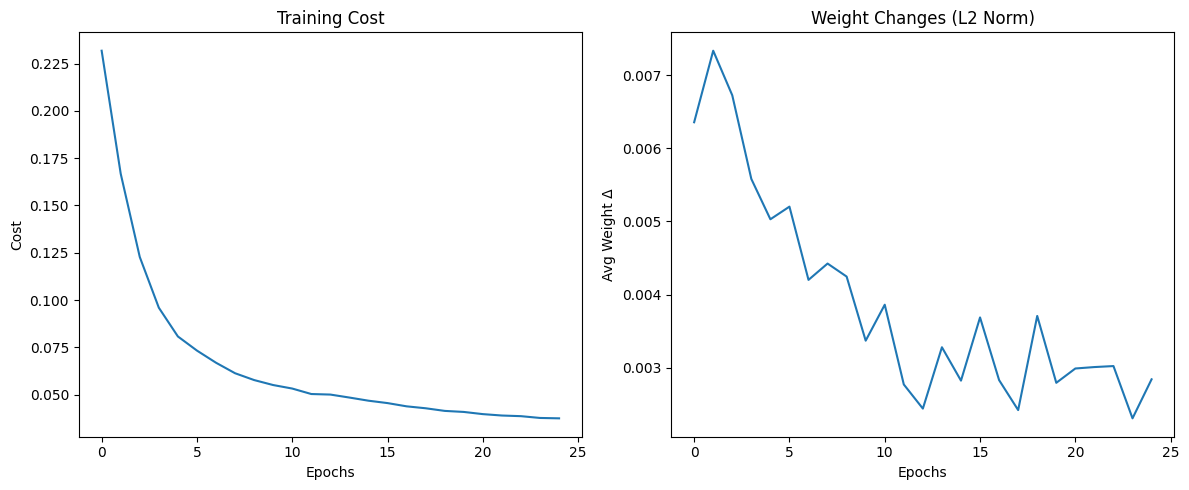

Epoch 26/30 - Cost: 7.0075 - Avg Weight Δ: 0.002901
Epoch 27/30 - Cost: 6.8939 - Avg Weight Δ: 0.002210
Epoch 28/30 - Cost: 6.7645 - Avg Weight Δ: 0.002705
Epoch 29/30 - Cost: 6.6526 - Avg Weight Δ: 0.001756
Epoch 30/30 - Cost: 6.4828 - Avg Weight Δ: 0.002554


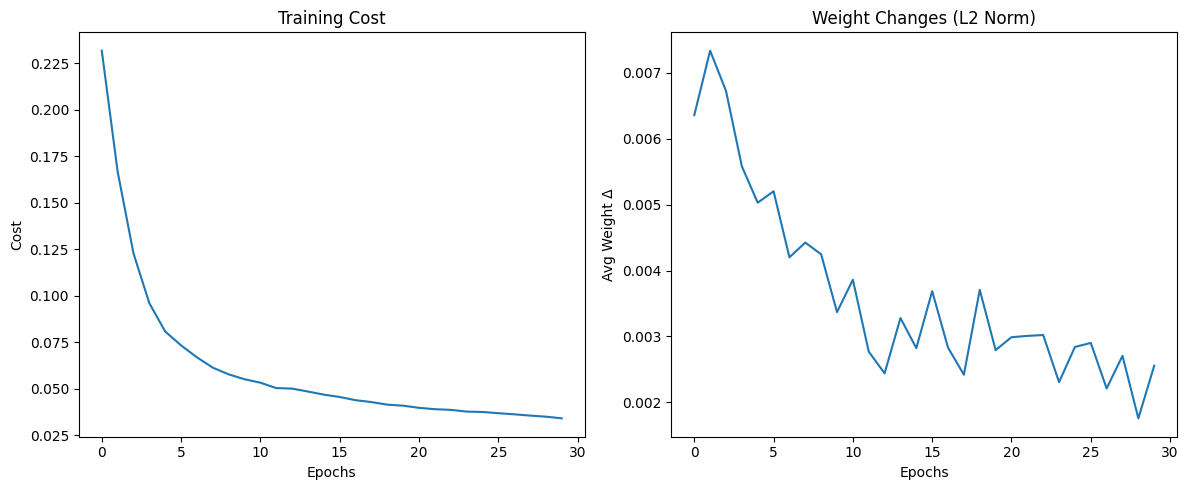

Training Accuracy for 7s: 0.9453
Training Accuracy for 9s: 0.9190
Combined Training Accuracy: 0.9321


In [28]:
# Prepare training data for digits 7 and 9
train_X_7_9, train_y_7_9 = extract_digits(train_X, train_y, d1=7, d2=9)
train_X_7_9 = vectorize_images(train_X_7_9)
train_y_7_9 = np.where(train_y_7_9 == 7, 0, 1)  # Convert labels to binary (7->0, 9->1)

# Hyperparameters
best_params_7_9 = {
    'hidden_layers': [300, 150],
    'batch_size': 64,
    'eta': 0.02,
    'epochs': 30
}

# Train the model
model_7_9 = train_NNet(
    X=train_X_7_9,
    Y=train_y_7_9.reshape(1, -1),
    epochs=best_params_7_9['epochs'],
    batch_size=best_params_7_9['batch_size'],
    eta=best_params_7_9['eta']
)

train_X_reshaped = train_X.transpose((1, 2, 0))


# Verification for model_7_9
images_7 = train_X_reshaped[:, :, train_y == 7].transpose((2, 0, 1))
images_9 = train_X_reshaped[:, :, train_y == 9].transpose((2, 0, 1))

train_pred_7 = predict(model_7_9, images_7, 7, 9)
train_pred_9 = predict(model_7_9, images_9, 7, 9)

accuracy_7 = np.mean(train_pred_7 == 7)
accuracy_9 = np.mean(train_pred_9 == 9)

print(f"Training Accuracy for 7s: {accuracy_7:.4f}")
print(f"Training Accuracy for 9s: {accuracy_9:.4f}")
print(f"Combined Training Accuracy: {(accuracy_7 + accuracy_9)/2:.4f}")